In [1]:
# Notebook library imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; import rcParams_big_fontsize

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    # rating_update is the original data 'beer_review.csv' with beer_style updated
    # bad brewery and profile names updated
    # beer_style updated
    # The updates change beer_style to match the styles that are given in 'beer_description.csv'

    return pd.read_csv("rating_update.csv")

In [3]:
beer_ratings = get_data()

In [4]:
pd.set_option('display.float_format', 
              lambda x: '%.2f' % x)

(beer_ratings.loc[:,['review_overall','review_aroma','review_appearance',
                    'review_palate','review_taste','beer_abv']]
             .describe()
)

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00
mean,3.82,3.74,3.84,3.74,3.79,7.00
std,0.72,0.70,0.62,0.68,0.73,2.30
min,0.00,1.00,0.00,1.00,1.00,0.01
25%,3.50,3.50,3.50,3.50,3.50,5.20
50%,4.00,4.00,4.00,4.00,4.00,6.50
75%,4.50,4.00,4.00,4.00,4.50,8.50
max,5.00,5.00,5.00,5.00,5.00,57.70


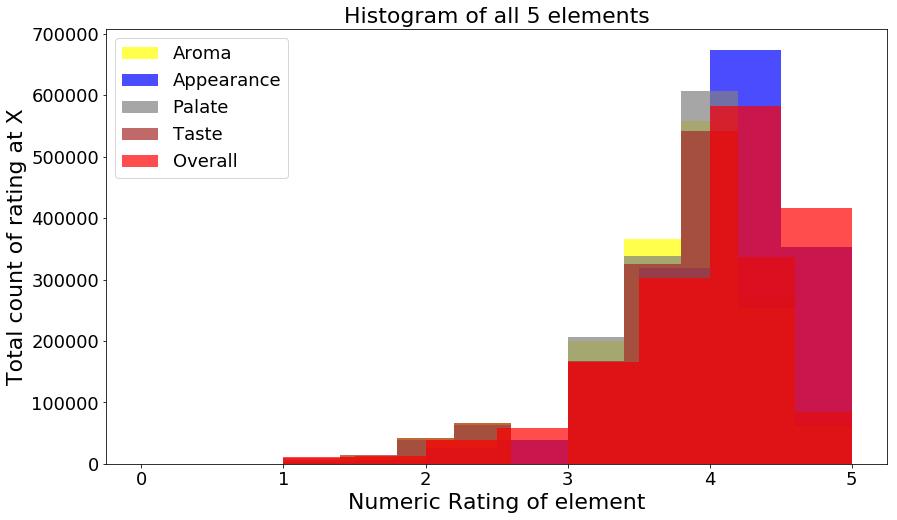

In [5]:
%matplotlib inline

plt.figure(figsize=[14,8])
# Aroma
plt.hist(beer_ratings.review_aroma.values, 
         alpha=.7, 
         color='yellow', 
         label='Aroma')
# Appearance
plt.hist(beer_ratings.review_appearance.values, 
         alpha=.7, 
         color='blue', 
         label='Appearance')
# Palate
plt.hist(beer_ratings.review_palate.values, 
         alpha=.7, 
         color='grey', 
         label='Palate')
# Taste
plt.hist(beer_ratings.review_taste.values, 
         alpha=.7,
         color='brown', 
         label='Taste')
# Review Overall
plt.hist(beer_ratings.review_overall.values, 
         alpha=.7, 
         color='red', 
         label='Overall')

plt.title('Histogram of all 5 elements')
plt.xlabel('Numeric Rating of element')
plt.ylabel('Total count of rating at X')
plt.legend(loc=2)

plt.show()

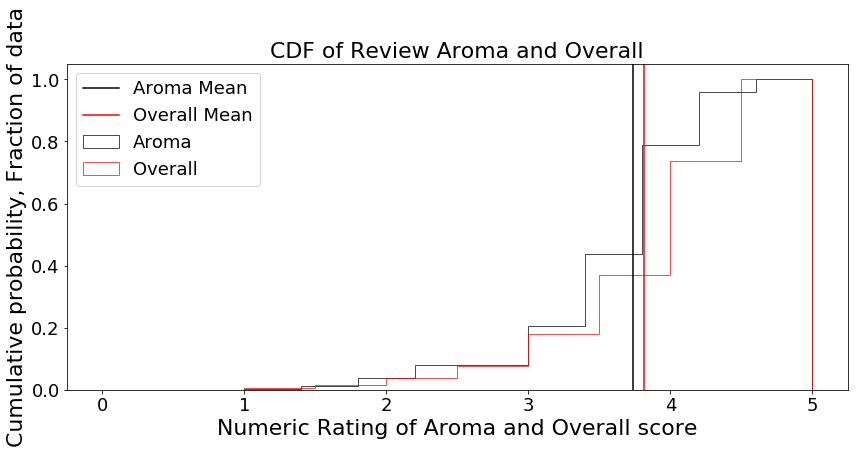

In [6]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_aroma.values, normed=True, cumulative=True, 
         label='Aroma', histtype='step', alpha=0.7, color='k')
plt.axvline(beer_ratings.review_aroma.values.mean(), color='k', label='Aroma Mean')

plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.axvline(beer_ratings.review_overall.values.mean(), color='red', label='Overall Mean')

plt.legend(loc=2)
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Aroma and Overall score')
plt.title('CDF of Review Aroma and Overall')
plt.show()

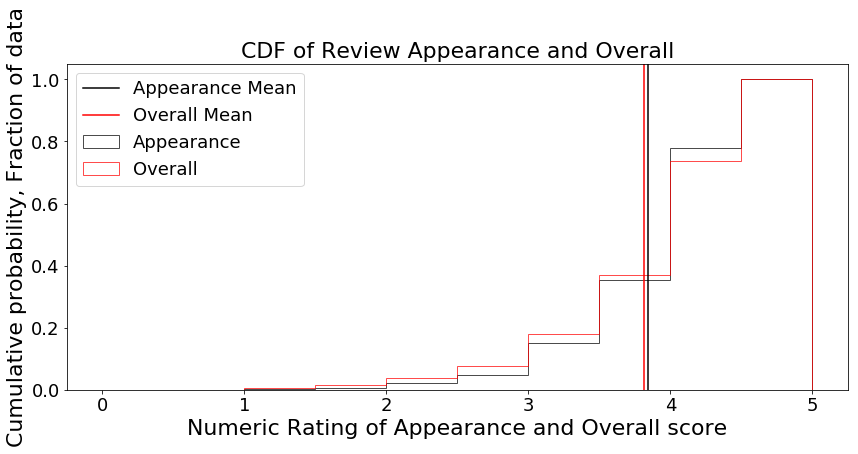

In [7]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_appearance.values, normed=True, cumulative=True, 
         label='Appearance', histtype='step', alpha=0.7, color='k')
plt.axvline(beer_ratings.review_appearance.values.mean(), color='k', label='Appearance Mean')

plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.axvline(beer_ratings.review_overall.values.mean(), color='red', label='Overall Mean')

plt.legend(loc=2)
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Appearance and Overall score')
plt.title('CDF of Review Appearance and Overall')
plt.show()

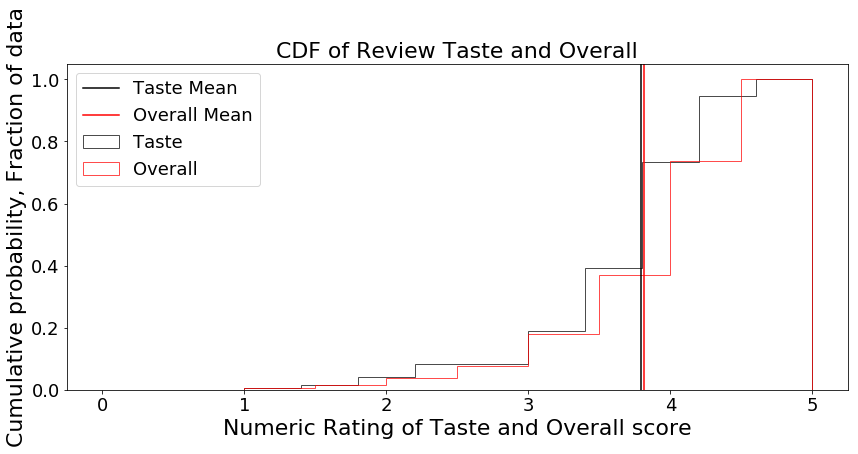

In [8]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_taste.values, normed=True, cumulative=True, 
         label='Taste', histtype='step', alpha=0.7, color='k')
plt.axvline(beer_ratings.review_taste.values.mean(), color='k', label='Taste Mean')

plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.axvline(beer_ratings.review_overall.values.mean(), color='red', label='Overall Mean')

plt.legend(loc=2)
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Taste and Overall score')
plt.title('CDF of Review Taste and Overall')
plt.show()

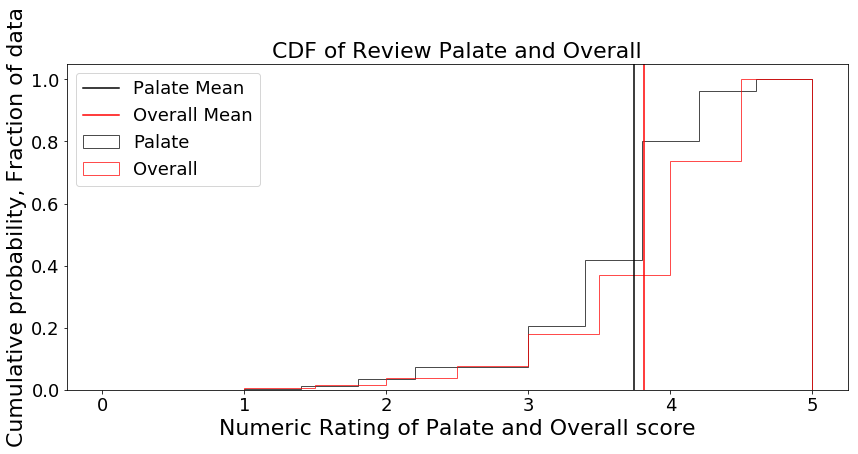

In [9]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_palate.values, normed=True, cumulative=True, 
         label='Palate', histtype='step', alpha=0.7, color='k')
plt.axvline(beer_ratings.review_palate.values.mean(), color='k', label='Palate Mean')

plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.axvline(beer_ratings.review_overall.values.mean(), color='red', label='Overall Mean')

plt.legend(loc=2)
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Palate and Overall score')
plt.title('CDF of Review Palate and Overall')
plt.show()

### Modeling prediction accuracy of review traits to review_overall with logistic regression

In [10]:
# For model building
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Optimizations
from sklearn.metrics import accuracy_score, mean_squared_error

In [11]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

Averaged will include the average of all categories sans Review Overall which is our target variable

In [12]:
beer_ratings['averaged'] = (beer_ratings.review_appearance + \
                           beer_ratings.review_aroma + \
                           beer_ratings.review_taste + \
                           beer_ratings.review_palate) / 4

In [13]:
target = beer_ratings['review_overall'].apply(lambda x:1 if x>=3.5 else 0)

In [14]:
predictors = beer_ratings.loc[:,['review_aroma','review_appearance',
                                 'review_palate','review_taste',
                                 'averaged', 'beer_abv']]

In [15]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 6 columns):
review_aroma         1586614 non-null float64
review_appearance    1586614 non-null float64
review_palate        1586614 non-null float64
review_taste         1586614 non-null float64
averaged             1586614 non-null float64
beer_abv             1586614 non-null float64
dtypes: float64(6)
memory usage: 72.6 MB


In [16]:
print(predictors.shape)
print(target.shape)

(1586614, 6)
(1586614,)


In [17]:
predictors.keys()

Index(['review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'averaged', 'beer_abv'],
      dtype='object')

In [18]:
review_predictors = {}

# Build a dictionary of predictive elements
# Will be used to compare RMSE and Accuracy

review_predictors['aroma'] = predictors['review_aroma'].values.reshape(-1,1)
review_predictors['appearance'] = predictors['review_appearance'].values.reshape(-1,1)
review_predictors['palate'] = predictors['review_palate'].values.reshape(-1,1)
review_predictors['taste'] = predictors['review_taste'].values.reshape(-1,1)

# Base features will be the predictive element
# consisting solely of the four review elements
review_predictors['base_features'] = predictors[['review_aroma', 
                                                 'review_appearance', 
                                                 'review_taste', 
                                                 'review_palate']].values

review_predictors['averaged'] = predictors['averaged'].values.reshape(-1,1)
review_predictors['abv'] = predictors['beer_abv'].values.reshape(-1,1)
review_predictors['combined'] = predictors.values

In [19]:
predictor_accuracy = {}
RMSE = {}

for x in review_predictors :
    
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(review_predictors[str(x)], 
                                                  target.values, 
                                                  test_size=.25)

    log_reg = LogisticRegression()

    # Fit the model on the trainng data.
    log_reg.fit(Xlr, ylr)

    # Predict the labels
    y_pred = log_reg.predict(Xlr)
    
    # Print the accuracy from the testing data. 
    # This takes total predictions correct / total predictions made
    predictor_accuracy[str(x)] = accuracy_score(log_reg.predict(Xtestlr), 
                                                ytestlr)
    
    # Root Mean Squared Error (Smaller is better)
    RMSE[str(x)] = np.sqrt(mean_squared_error(log_reg.predict(Xtestlr), 
                                              ytestlr))
    

In [20]:
from sklearn.model_selection import GridSearchCV

Xlr, Xtestlr, ylr, ytestlr = train_test_split(predictors.values, 
                                                  target.values, 
                                                  test_size=.25)

C_grid = {'C': [0.001, 0.01, 0.1, 1, 6]}

# Set the amount of folds for the cross-validation
n_folds = 5

# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l1', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=2, refit=True)
grid_logReg.fit(Xlr, ylr)

# Predict the labels
y_pred = log_reg.predict(Xlr)
    
# Print the accuracy from the testing data. 
# This takes total predictions correct / total predictions made
print(accuracy_score(log_reg.predict(Xtestlr), ytestlr))
    
# Root Mean Squared Error (Smaller is better)
print(np.sqrt(mean_squared_error(log_reg.predict(Xtestlr), ytestlr)))

0.909944183092
0.300093013761


In [21]:
plt.figure(figsize=[14,6])
plt.semilogx(C_values, grid_logReg.cv_results_['mean_test_score'])
plt.show();

NameError: name 'C_values' is not defined

In [ ]:
predictor_accuracy

In [ ]:
RMSE

## Simple works just as well as ensemble. K.I.S.S.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
predictor_results = {}

Xlr, Xtestlr, ylr, ytestlr = train_test_split(review_predictors['combined'], 
                                              target.values, 
                                              test_size=.25, 
                                              random_state=21)

RFR_reg = RandomForestRegressor()

# Fit the model on the trainng data.
RFR_reg.fit(Xlr, ylr)

# Predict the labels
y_pred = RFR_reg.predict(Xlr)

# Print the accuracy from the testing data. 
# This takes total predictions correct / total predictions made
predictor_results['combined'] = accuracy_score(log_reg.predict(Xtestlr), 
                                               ytestlr)

In [ ]:
predictor_results

## More parlor tricks, sklearn label encoding
* This will use beer style and create additional features based on binary 0/1 for styles

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_style = LabelEncoder()

beer_ratings['style_encoded'] = le_style.fit_transform(beer_ratings.beer_style)

from sklearn.preprocessing import OneHotEncoder

style_ohe = OneHotEncoder()

X = (style_ohe.fit_transform(beer_ratings.style_encoded.values.reshape(-1,1))
              .toarray()
    )

In [ ]:
unique_styles = beer_ratings.beer_style.unique()
dfOneHot = pd.DataFrame(X, 
                        columns = [style for style in unique_styles])

df = pd.concat([beer_ratings, dfOneHot], 
               axis=1)

In [ ]:
beer_ratings.keys()

In [ ]:
df = df.drop(['brewery_id', 'brewery_name', 'review_time', 
              'review_overall','review_profilename', 'beer_style', 
              'beer_name', 'beer_beerid', 'style_encoded'], axis = 1)

In [ ]:
encoded_predictors = {}

encoded_predictors['encoded'] = df.values

In [ ]:
encoded_accuracy = {}
encoded_RMSE = {}

Xlr, Xtestlr, ylr, ytestlr = train_test_split(encoded_predictors['encoded'], 
                                              target.values, 
                                              test_size=.25, 
                                              random_state=42)

log_reg = LogisticRegression()

    # Fit the model on the trainng data.
log_reg.fit(Xlr, ylr)

    # Predict the labels
y_pred = log_reg.predict(Xlr)

# Print the accuracy from the testing data. 
# This takes total predictions correct / total predictions made
encoded_accuracy['combined'] = accuracy_score(log_reg.predict(Xtestlr), 
                                              ytestlr)

# Root Mean Squared Error (Smaller is better)
encoded_RMSE['combined'] = np.sqrt(mean_squared_error(log_reg.predict(Xtestlr), 
                                                      ytestlr))

In [ ]:
encoded_accuracy

In [ ]:
encoded_RMSE